<a href="https://colab.research.google.com/github/Diwz-1144/project_vault/blob/main/YBI_Internship_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bank Customer Churn Model**

---



**Objective : To predict or identify which customers of the bank are likely to churn and to take action to prevent it**

Data Source : https://github.com/YBI-Foundation/Dataset/raw/main/Bank%20Churn%20Modelling.csv

## Import Library

In [101]:
import pandas as pd

In [102]:
import numpy as np

In [103]:
import matplotlib.pyplot as plt

In [104]:
import seaborn as sns

## Import Data

In [105]:
df=pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/Bank%20Churn%20Modelling.csv')

## Describe Data

In [106]:
df.head()


,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [107]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerId        10000 non-null  int64  
 1   Surname           10000 non-null  object 
 2   CreditScore       10000 non-null  int64  
 3   Geography         10000 non-null  object 
 4   Gender            10000 non-null  object 
 5   Age               10000 non-null  int64  
 6   Tenure            10000 non-null  int64  
 7   Balance           10000 non-null  float64
 8   Num Of Products   10000 non-null  int64  
 9   Has Credit Card   10000 non-null  int64  
 10  Is Active Member  10000 non-null  int64  
 11  Estimated Salary  10000 non-null  float64
 12  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [108]:
df.duplicated('CustomerId').sum()


0

In [109]:
df=df.set_index('CustomerId')

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 15634602 to 15628319
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Surname           10000 non-null  object 
 1   CreditScore       10000 non-null  int64  
 2   Geography         10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Tenure            10000 non-null  int64  
 6   Balance           10000 non-null  float64
 7   Num Of Products   10000 non-null  int64  
 8   Has Credit Card   10000 non-null  int64  
 9   Is Active Member  10000 non-null  int64  
 10  Estimated Salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 1015.6+ KB


In [111]:
df.describe()

,CreditScore,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [112]:
print(df)

              Surname  CreditScore Geography  Gender  Age  Tenure    Balance  \
CustomerId                                                                     
15634602     Hargrave          619    France  Female   42       2       0.00   
15647311         Hill          608     Spain  Female   41       1   83807.86   
15619304         Onio          502    France  Female   42       8  159660.80   
15701354         Boni          699    France  Female   39       1       0.00   
15737888     Mitchell          850     Spain  Female   43       2  125510.82   
...               ...          ...       ...     ...  ...     ...        ...   
15606229     Obijiaku          771    France    Male   39       5       0.00   
15569892    Johnstone          516    France    Male   35      10   57369.61   
15584532          Liu          709    France  Female   36       7       0.00   
15682355    Sabbatini          772   Germany    Male   42       3   75075.31   
15628319       Walker          792    Fr

## Data Visualization

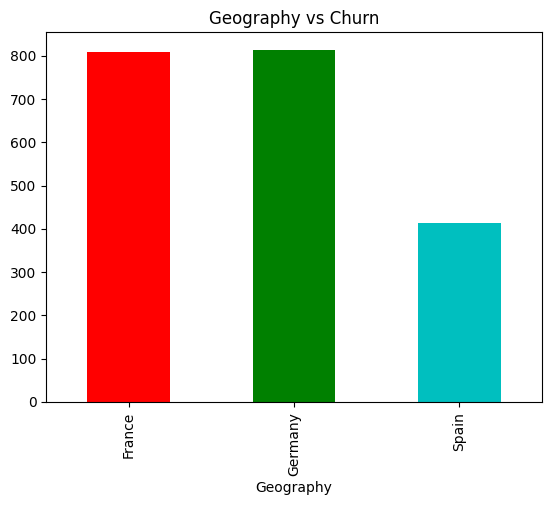

In [113]:
df[df['Churn']==1].groupby("Geography")["Churn"].count().plot(kind='bar',color=['r','g','c'])
plt.title('Geography vs Churn')
plt.show()

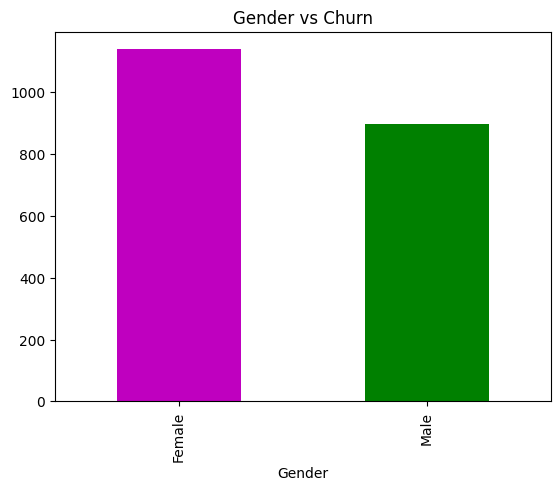

In [114]:
df[df['Churn']==1].groupby("Gender")["Churn"].count().plot(kind='bar',color=['m','g'])
plt.title('Gender vs Churn')
plt.show()

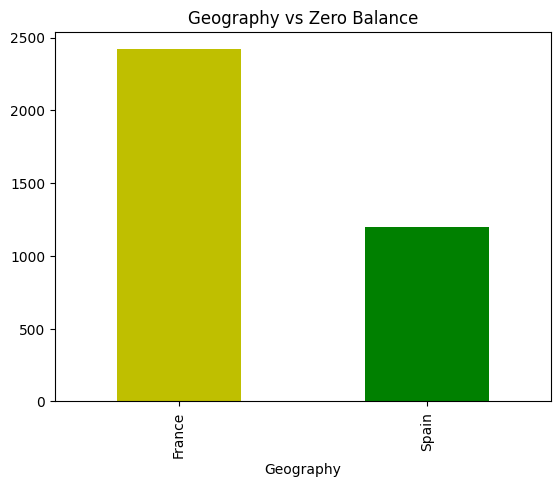

In [115]:
df[df['Balance']==0.0].groupby("Geography")["Balance"].count().plot(kind='bar',color=['y','g'])
plt.title('Geography vs Zero Balance')
plt.show()

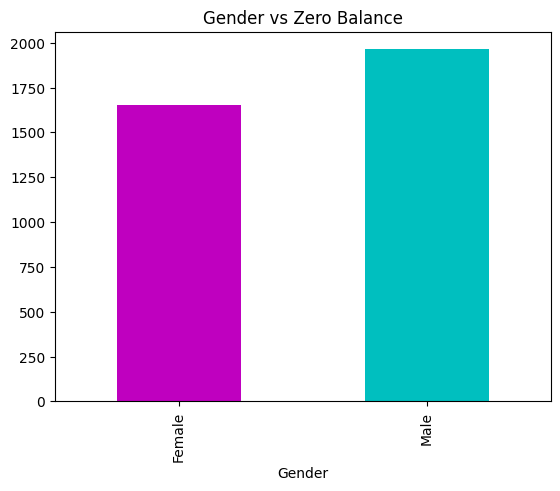

In [116]:
df[df['Balance']==0.0].groupby("Gender")["Balance"].count().plot(kind='bar',color=['m','c'])
plt.title('Gender vs Zero Balance')
plt.show()

## Data Preprocessing

In [117]:
df['Geography'].value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


In [118]:
df.replace({"Geography":{"France":2,"Germany":1,"Spain":0}},inplace=True)

In [119]:
df['Gender'].value_counts()

,count
Gender,
Male,5457
Female,4543


In [120]:
df.replace({"Gender":{"Male":0,"Female":1}},inplace=True)

In [121]:
df['Num Of Products'].value_counts()

,count
Num Of Products,
1,5084
2,4590
3,266
4,60


In [122]:
df.replace({"Num Of Products":{1:0,2:1,3:1,4:1}},inplace=True)

In [123]:
df['Has Credit Card'].value_counts()

,count
Has Credit Card,
1,7055
0,2945


In [124]:
df['Is Active Member'].value_counts()

,count
Is Active Member,
1,5151
0,4849


In [125]:
df.loc[(df["Balance"]==0),"Churn"].value_counts()

,count
Churn,
0,3117
1,500


In [126]:
df['Zero Balance']=np.where(df['Balance']>0,1,0)

In [127]:
df.groupby(["Churn","Geography"]).count()

Surname  CreditScore  Gender   Age  Tenure  Balance  \
Churn Geography                                                        
0     0             2064         2064    2064  2064    2064     2064   
      1             1695         1695    1695  1695    1695     1695   
      2             4204         4204    4204  4204    4204     4204   
1     0              413          413     413   413     413      413   
      1              814          814     814   814     814      814   
      2              810          810     810   810     810      810   

                 Num Of Products  Has Credit Card  Is Active Member  \
Churn Geography                                                       
0     0                     2064             2064              2064   
      1                     1695             1695              1695   
      2                     4204             4204              4204   
1     0                      413              413               413   
      1                      814              814               814   
      2                      810              810               810   

                 Estimated Salary  Zero Balance  
Churn Geography                                  
0     0                      2064          2064  
      1                      1695          1695  
      2                      4204          4204  
1     0                       413           413  
      1                       814           814  
      2                       810           810

## Define Target Variable (y) and Feature Variables (x)

In [128]:
df.columns

Index(['Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'Num Of Products', 'Has Credit Card', 'Is Active Member',
       'Estimated Salary', 'Churn', 'Zero Balance'],
      dtype='object')

In [129]:
x=df.drop(["Surname","Churn"],axis=1)

In [130]:
y=df["Churn"]

In [131]:
x.shape,y.shape

((10000, 11), (10000,))

In [132]:
# Handling class imbalance of data using Random Over Sampling

In [133]:
from imblearn.over_sampling import RandomOverSampler
ros=RandomOverSampler(random_state=2529)
x_ros,y_ros=ros.fit_resample(x,y)
x_ros.shape,y_ros.shape,x.shape,y.shape

((15926, 11), (15926,), (10000, 11), (10000,))

In [134]:
y.value_counts()

,count
Churn,
0,7963
1,2037


In [135]:
y_ros.value_counts()

,count
Churn,
1,7963
0,7963


## Train Test Split

In [136]:
from sklearn.model_selection import train_test_split
x_train_ros,x_test_ros,y_train_ros,y_test_ros=train_test_split(x_ros,y_ros,train_size=0.7,random_state=2529)


In [137]:
# Standardizing feature variables

In [138]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train_ros[['CreditScore','Age','Tenure','Balance','Estimated Salary']]=sc.fit_transform(x_train_ros[['CreditScore','Age','Tenure','Balance','Estimated Salary']])
x_test_ros[['CreditScore','Age','Tenure','Balance','Estimated Salary']]=sc.fit_transform(x_test_ros[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

## Modeling

In [139]:
## Using Support Vector Machine Classifier

In [140]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train_ros,y_train_ros)
y_pred_ros=svc.predict(x_test_ros)

### **Model Evaluation**

In [141]:
from sklearn.metrics import confusion_matrix,classification_report

In [142]:
confusion_matrix(y_test_ros,y_pred_ros)

array([[1823,  556],
       [ 626, 1773]])

In [143]:
print(classification_report(y_test_ros,y_pred_ros))

              precision    recall  f1-score   support

           0       0.74      0.77      0.76      2379
           1       0.76      0.74      0.75      2399

    accuracy                           0.75      4778
   macro avg       0.75      0.75      0.75      4778
weighted avg       0.75      0.75      0.75      4778



### ***Hyperparameter Tunning of the Model***

In [144]:
from sklearn.model_selection import GridSearchCV
param_grid={'C':[0.1,1,10],
            'gamma':[1,0.1,0.01],
            'kernel':['rbf'],
            'class_weight':['balanced']}
grid=GridSearchCV(SVC(),param_grid,refit=True,verbose=2,cv=2)
grid.fit(x_train_ros,y_train_ros)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   3.8s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   3.5s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   2.6s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   4.0s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   3.0s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   2.9s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   3.0s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   4.3s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   2.5s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   2.2s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   2.5s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [145]:
print(grid.best_estimator_)

SVC(C=10, class_weight='balanced', gamma=1)


In [146]:
grid_predictions=grid.predict(x_test_ros)

### **Model Evaluation**

In [147]:
from sklearn.metrics import confusion_matrix,classification_report

In [148]:
confusion_matrix(y_test_ros,grid_predictions)

array([[2047,  332],
       [  68, 2331]])

In [149]:
print(classification_report(y_test_ros,grid_predictions))

              precision    recall  f1-score   support

           0       0.97      0.86      0.91      2379
           1       0.88      0.97      0.92      2399

    accuracy                           0.92      4778
   macro avg       0.92      0.92      0.92      4778
weighted avg       0.92      0.92      0.92      4778



##Prediction

In [150]:
# CODE TO PASS INPUT TO ML MODEL FOR PREDICTING OUTPUT:
data=[]
print("Please enter following data for Customer Churn Prediction :-")
for cols in x_test_ros.columns:
  print("Enter",cols,":")
  if(cols=="Geography"):
    print("*For Spain, Enter:0\n*For Germany,Enter:1\n*For France, Enter:2")
  if(cols=="Gender"):
    print("*For Male, Enter:0\n*For Female, Enter:1")
  if(cols=="Num Of Products"):
    print("*If no. of products is equal to 1, Enter:0\n*If no. of products is more than 1, Enter:1")
  data.append(input())
#converting the list data into dataframe to pass as query to ML model
query_data=pd.DataFrame([data],columns=list(x_test_ros.columns))
#Standardizing the input data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
query_data[['CreditScore','Age','Tenure','Balance','Estimated Salary']]=sc.fit_transform(query_data[['CreditScore','Age','Tenure','Balance','Estimated Salary']])
query_result=grid.predict(query_data)
query_result=list(query_result)
for num in range(100):
  print("*",end="")
print()
print("PREDICTION :",query_result)
if(query_result[0]==1):
  print("The ML model predicts that this Bank Customer will churn")
else:
  print("The ML model predicts that this Bank Customer will not churn")
for num in range(100):
  print("*",end="")


Please enter following data for Customer Churn Prediction :-
Enter CreditScore :
475
Enter Geography :
*For Spain, Enter:0
*For Germany,Enter:1
*For France, Enter:2
2
Enter Gender :
*For Male, Enter:0
*For Female, Enter:1
1
Enter Age :
45
Enter Tenure :
0
Enter Balance :
134264
Enter Num Of Products :
*If no. of products is equal to 1, Enter:0
*If no. of products is more than 1, Enter:1
0
Enter Has Credit Card :
1
Enter Is Active Member :
0
Enter Estimated Salary :
27822
Enter Zero Balance :
1
****************************************************************************************************
PREDICTION : [1]
The ML model predicts that this Bank Customer will churn
****************************************************************************************************

## Explanation

Customer Churn prediction means knowing which customers are likely to leave or unsubscribe from your service. For many companies, this is an important prediction. This is because acquiring new customers often costs more than retaining existing ones. Once you’ve identified customers at risk of churn, you need to know exactly what marketing efforts you should make with each customer to maximize their likelihood of staying.
This Machine Learning model of Bank Customer Churn Prediction is based on Support Vector Machine Classifier [SVM] ML model with an **accuracy of 92%** and **recall of the field of interest i.e, "Churn" is 97%** (after Hyperparameter Tuning).
This ML model predicts which customers are likely to leave a bank and stop using its services based on following data:


*   CreditScore
*   Geography
*   Gender
*   Age
*   Tenure
*   Balance
*   Num Of Products
*   Has Credit Card
*   Is Active Member
*   Estimated Salary
*   Zero Balance

